In [1]:
#push!(LOAD_PATH,"c:/Users/jmbeckers/Documents/GitHub/DIVAnd.jl/src")
#using Pkg
#Pkg.add("DIVAnd")
#using DIVAnd
using PyPlot
using LinearAlgebra
using Statistics

In [2]:
using Pkg
Pkg.develop(path="/home/ctroupin/ULiege/Tools/DIVAnd.jl")

# check with:
Pkg.status()

using DIVAnd
@show pathof(DIVAnd)


      Status `~/.julia/environments/v1.7/Project.toml`
  [336ed68f] CSV v0.9.11
  [8be319e6] Chain v0.4.8
  [8f4d0f93] Conda v1.7.0
  [efc8151c] DIVAnd v2.7.7 `~/ULiege/Tools/DIVAnd.jl`
  [1b7aed40] DIVAndNN v0.1.0 `https://github.com/gher-ulg/DIVAndNN.jl#master`
  [7f46824f] DIVAnd_HFRadar v0.1.0 `https://github.com/gher-ulg/DIVAnd_HFRadar.jl#master`
  [864edb3b] DataStructures v0.18.10
  [b4f34e82] Distances v0.10.6
  [31c24e10] Distributions v0.25.29
  [2fb1d81b] GeoArrays v0.6.0
  [855c05df] GeoMapping v0.0.0 `git@github.com:Alexander-Barth/GeoMapping.jl.git#master`
  [0ef565a4] Geodesy v1.0.1
  [c27321d9] Glob v1.3.0
  [cd3eb016] HTTP v0.9.17
  [7073ff75] IJulia v1.23.2
  [a98d9a8b] Interpolations v0.13.4
  [682c06a0] JSON v0.21.2
  [23992714] MAT v0.10.1
  [e1d29d7a] Missings v1.0.2
  [0db19996] NBInclude v2.3.0
  [85f8d34a] NCDatasets v0.11.7
  [b946abbf] NaNStatistics v0.5.5
  [626c502c] Parquet v0.8.3
  [3725be50] PhysOcean v0.6.5
  [f3e62ec7] PkgCleanup v0.1.0 `https://github

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


"/home/ctroupin/ULiege/Tools/DIVAnd.jl/src/DIVAnd.jl"

In [3]:
ND=559
NX=200
NY=250
NV=2
len=0.2
# obs. error variance normalized by the background error variance
epsilon2 = 1.0;

# function to interpolate
fun(x,y,v) = 2*(sin.(6x) * cos.(6y))*(1.5-v) .+ (v.-1.0) .* x .* y

# observations

x = 0.5.+0.25.*randn(ND);
y = 0.5  .+ 0.25 .* randn(ND);
v = mod.(rand(Int,ND),20).+1
v[v.>1.3].=2

x[v.>1.5] .+= 0.2
x[v.<1.5] .+= -0.2
f = fun.(x,y,v)+0.2*randn(ND)
# final grid
xi,yi,vi = ndgrid(range(0,stop=1,length=NX),range(0,stop=1,length=NY),1:2);

# reference field
fref = fun.(xi,yi,vi)

# all points are valid points
mask = trues(size(xi));

mask[10:30,20:50,:].=false

# this problem has a simple cartesian metric
# pm is the inverse of the resolution along the 1st dimension
# pn is the inverse of the resolution along the 2nd dimension

pm = ones(size(xi)) / (xi[2,1,1]-xi[1,1,1]);
pn = ones(size(xi)) / (yi[1,2,1]-yi[1,1,1]);
pv = ones(size(xi)) / (vi[1,1,2]-vi[1,1,1]);

In [4]:
# fi is the interpolated field
@time fi,s = DIVAndrun(mask,(pm,pn,pv),(xi,yi,vi),(x,y,v),f,(len,len,0.0),epsilon2)

 22.269428 seconds (50.53 M allocations: 3.947 GiB, 7.32% gc time, 90.69% compilation time)


([0.1870520859199671 0.18071908476177412 … 0.10876100748891039 0.10849268538600525; 0.19470755072246348 0.18861024597656406 … 0.10914447511963625 0.10919453974472008; … ; 0.005305014096118483 0.00528703229873567 … -0.19753662048700063 -0.20136955884017163; 0.0049163200030310624 0.004924947891359837 … -0.19177757663474396 -0.19534621211247702;;; -0.24482763294776705 -0.235238239770614 … -0.383334756611467 -0.39210377784400025; -0.26442109109197104 -0.25515379683370926 … -0.394453870858217 -0.4036074832808483; … ; 0.41751065450068486 0.4095192474195342 … 1.2105876601750212 1.2235990094997053; 0.38466245393972326 0.3764471180619421 … 1.180966810669446 1.1940825783084743], DIVAnd.DIVAnd_struct{Float64, Int64, 3, SparseArrays.SparseMatrixCSC{Float64, Int64}}(3, 2, 0.5026548265639345, statevector{1, 3}(([1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1;;; 1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1],), 1, [98698], [100000], [(200, 250, 2)], [0, 98698], 98698, [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

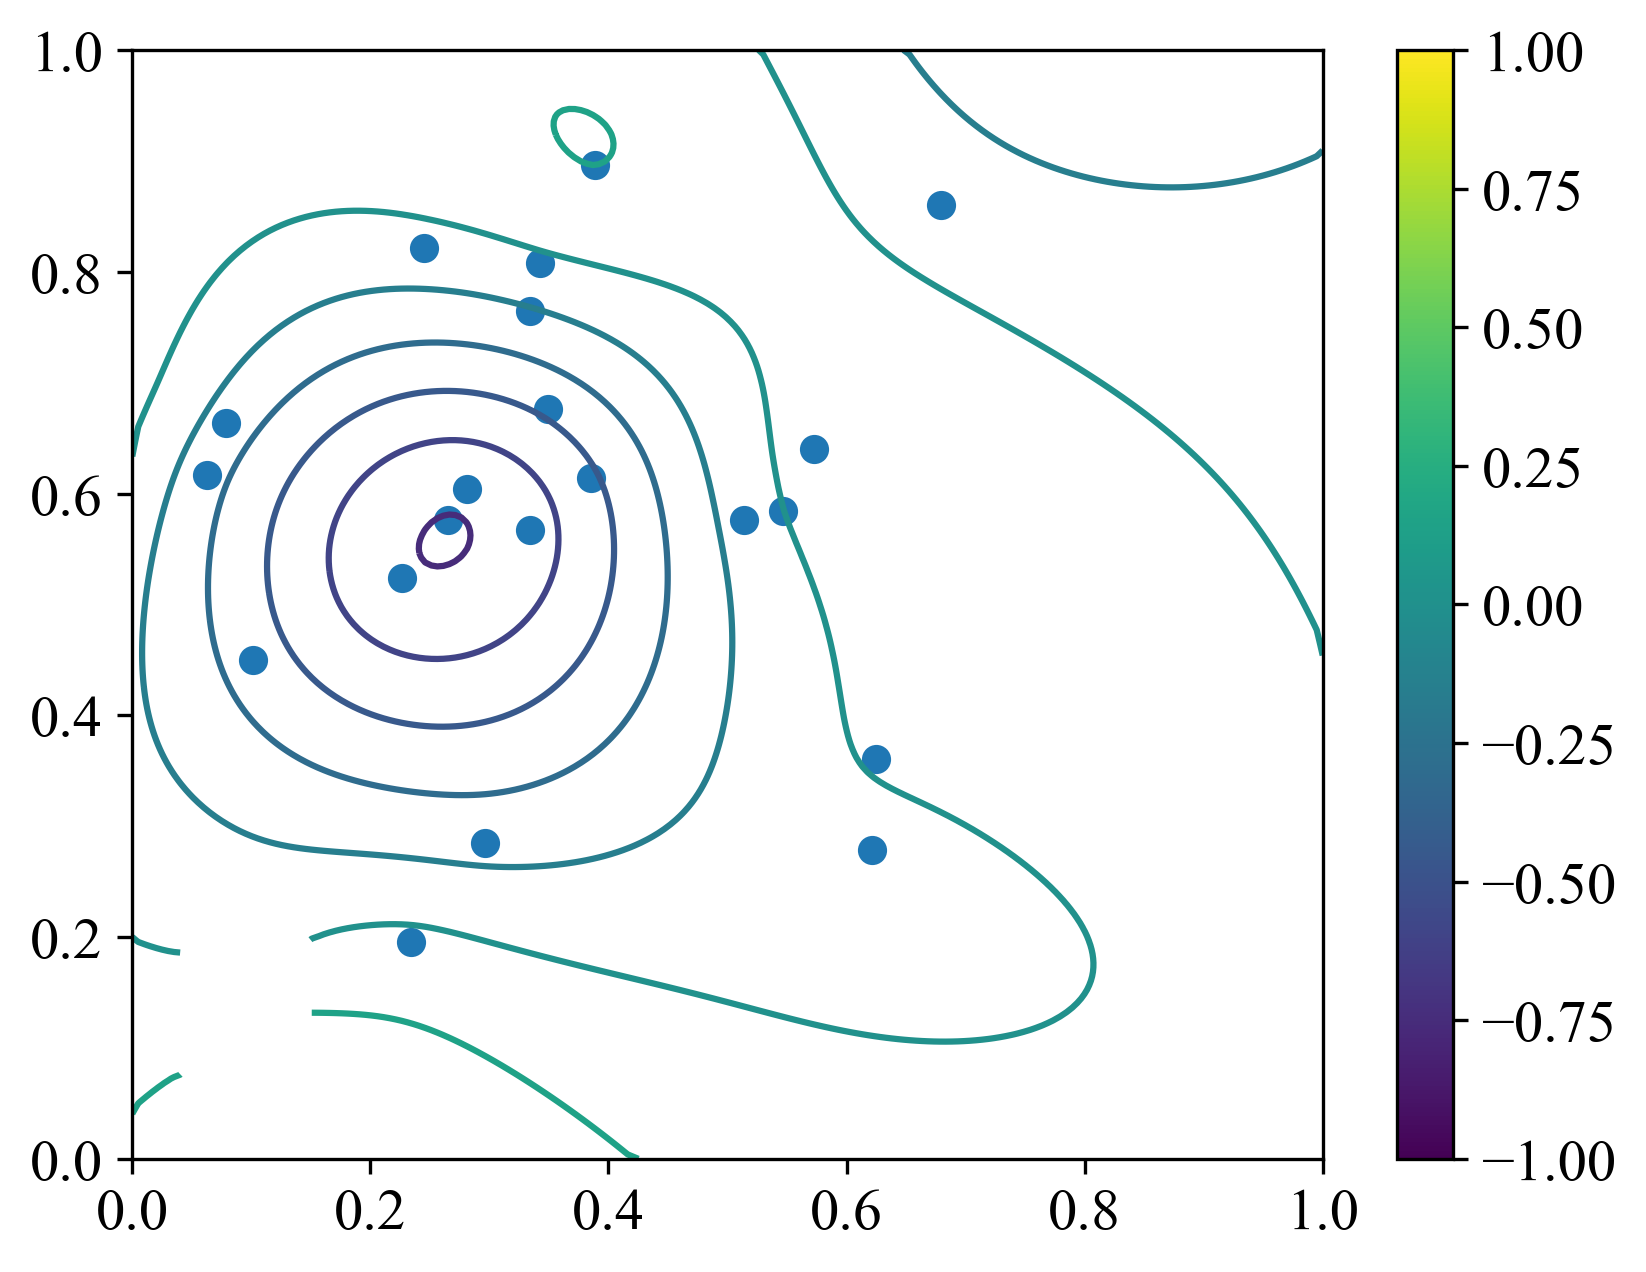

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/ctroupin/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc76393a90>

In [5]:

contour(xi[:,:,1],yi[:,:,1],fi[:,:,1])
clim(-1,1)
scatter(x[v.<1.5],y[v.<1.5])
xlim(0,1)
ylim(0,1)
clim(-1,1)
colorbar()

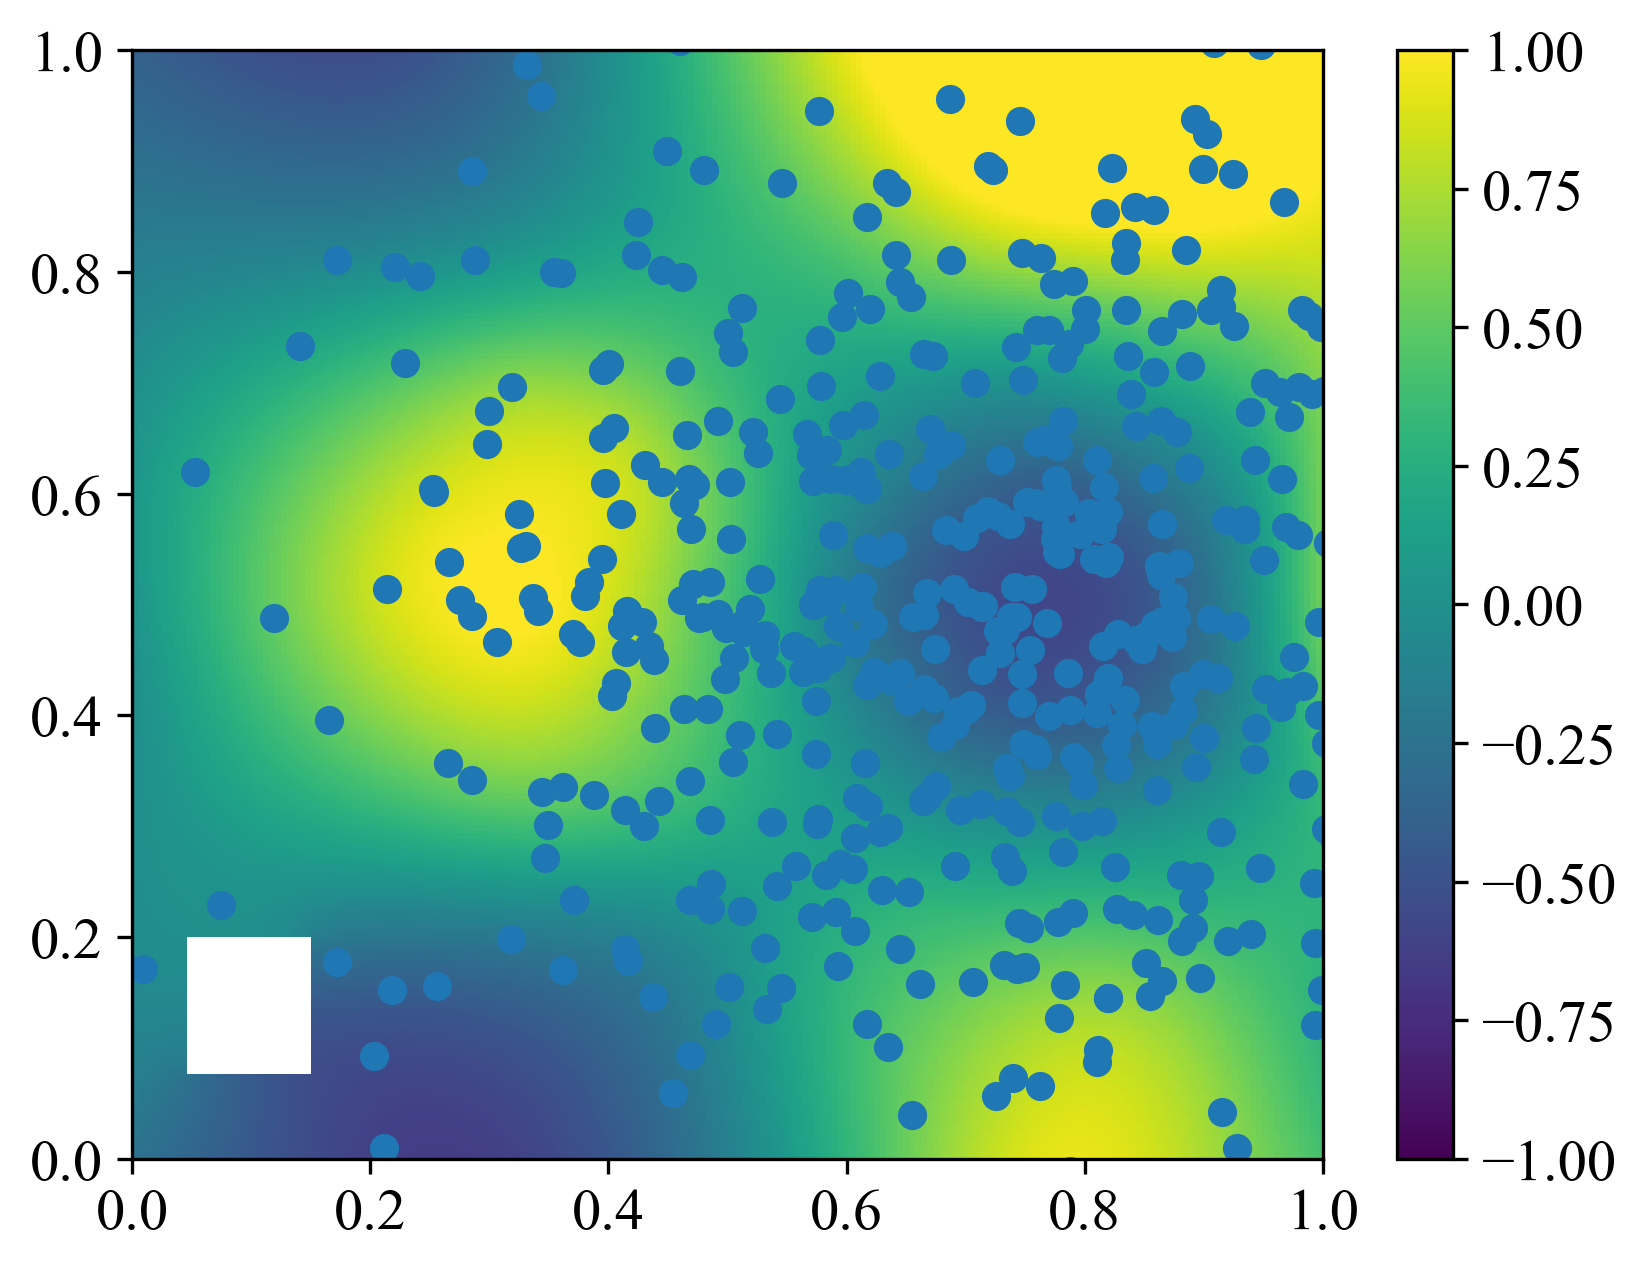

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc6d69aa50>

In [6]:
pcolor(xi[:,:,2],yi[:,:,2],fi[:,:,2])
clim(-1,1)
scatter(x[v.>1.5],y[v.>1.5])
xlim(0,1)
ylim(0,1)
clim(-1,1)
colorbar()

In [7]:
len=0.2*ones(Float64,size(mask));

In [8]:
@time fim,s,emap,emapm,pv=DIVAnd_multivarJAC(mask,(pm,pn,pv),(xi,yi,vi),(x,y,v),f,(len,len,0.0 .*len),epsilon2;epsilon2jacobian=(1.0,10.))

eps2jac = (1.0, 10.0)
"error method in multivar $(meth)" = "error method in multivar cpme"
methm = "cpme"
 39.344127 seconds (66.17 M allocations: 16.075 GiB, 5.84% gc time, 59.87% compilation time)


([0.11581167284091945 0.11193095830156699 … 0.09842287086638203 0.09955642282617201; 0.12242614436285111 0.11860451000149186 … 0.09993142477324289 0.10111714097360339; … ; -0.09971691706481722 -0.09899630793587262 … -0.22739841504190678 -0.2299351259633914; -0.0969363909119372 -0.09613985947150838 … -0.22158269590452545 -0.22391013066296092;;; -0.29022419205167277 -0.27869138855671627 … -0.39209703855786276 -0.39889658163819963; -0.3098632416643013 -0.29856067621072857 … -0.40167974530792444 -0.40920245244011366; … ; 0.41747060399559327 0.40947630068122953 … 1.2140401051521628 1.2273234107071425; 0.3846134214726963 0.3764008231230473 … 1.1845241792744652 1.1978652418652995], DIVAnd.DIVAnd_struct{Float64, Int64, 3, SparseArrays.SparseMatrixCSC{Float64, Int64}}(3, 2, 0.5026548265639345, statevector{1, 3}(([1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1;;; 1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1],), 1, [98698], [100000], [(200, 250, 2)], [0, 98698], 98698, [[1, 2, 3, 4, 5, 6, 7, 8,

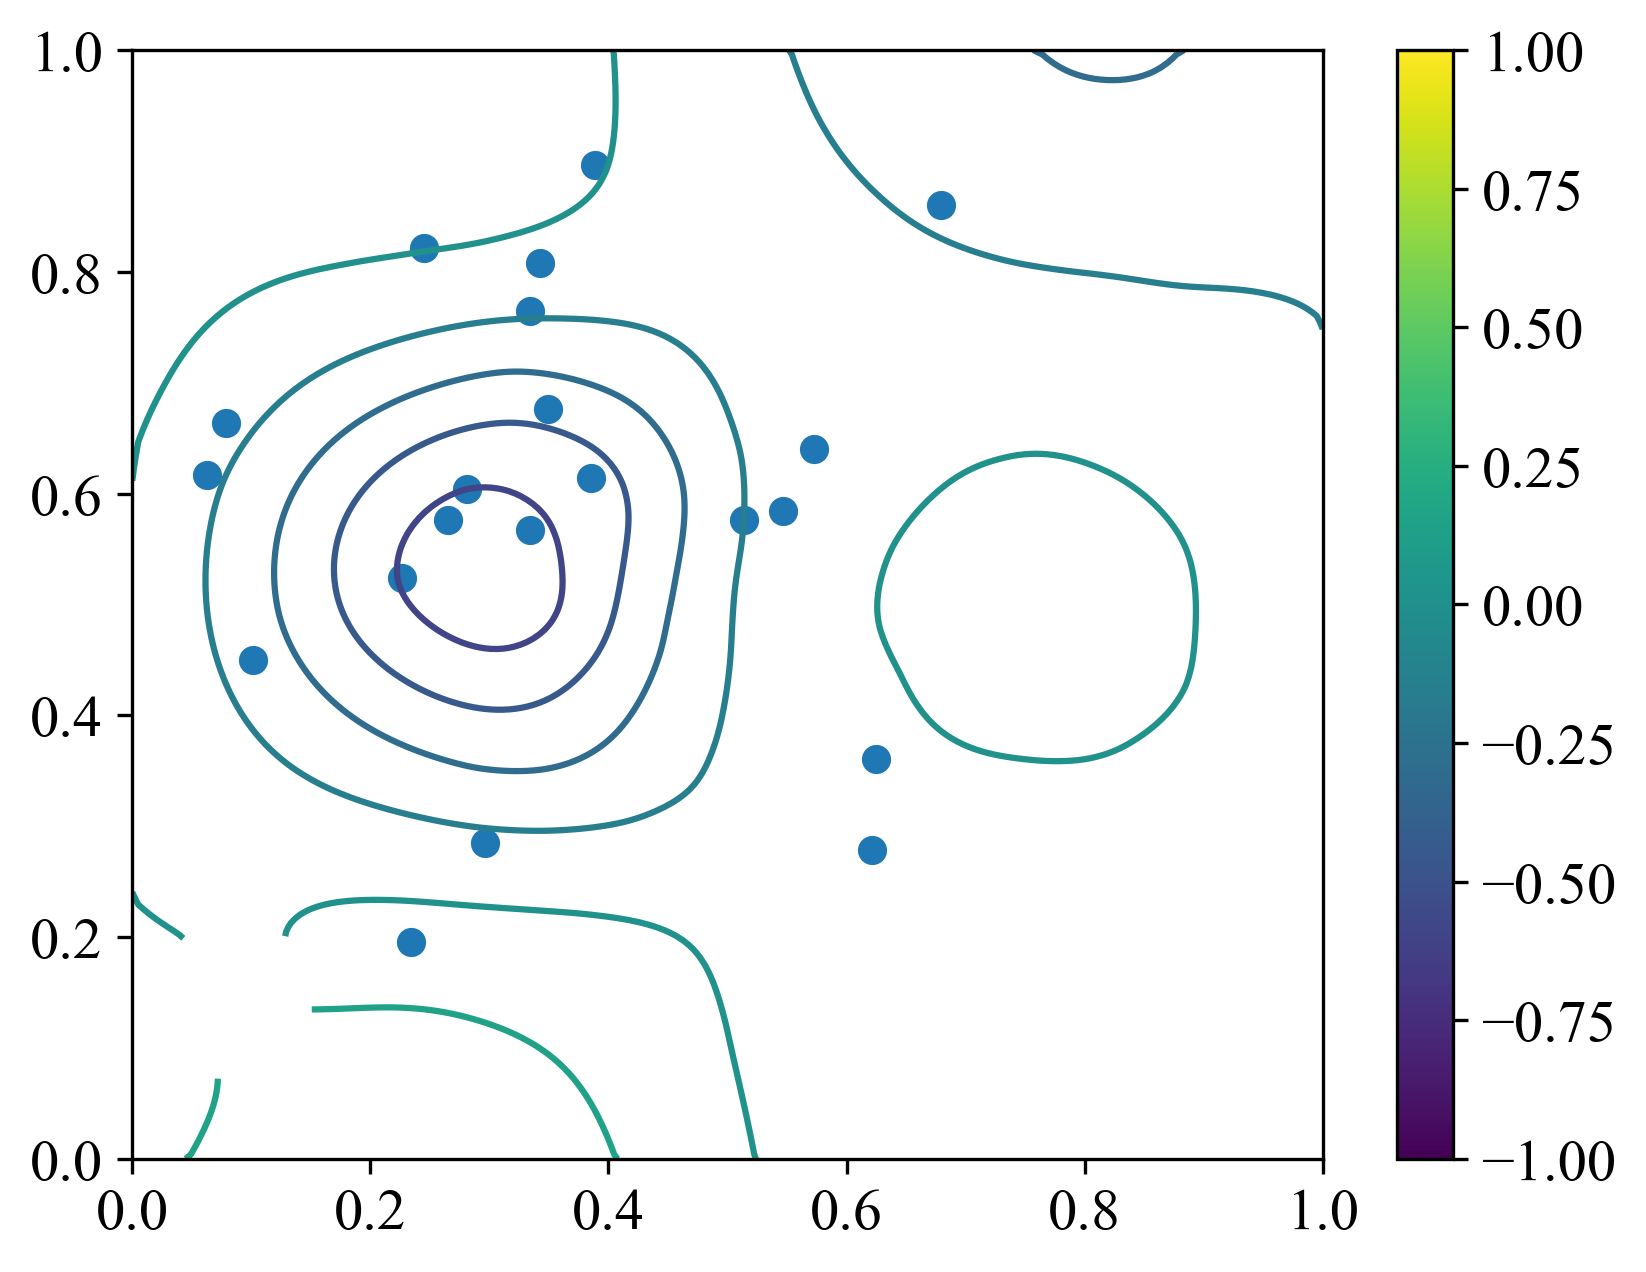

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc7ac01e90>

In [9]:
contour(xi[:,:,1],yi[:,:,1],fim[:,:,1])
clim(-1,1)
scatter(x[v.<1.5],y[v.<1.5])
xlim(0,1)
ylim(0,1)
clim(-1,1)
colorbar()

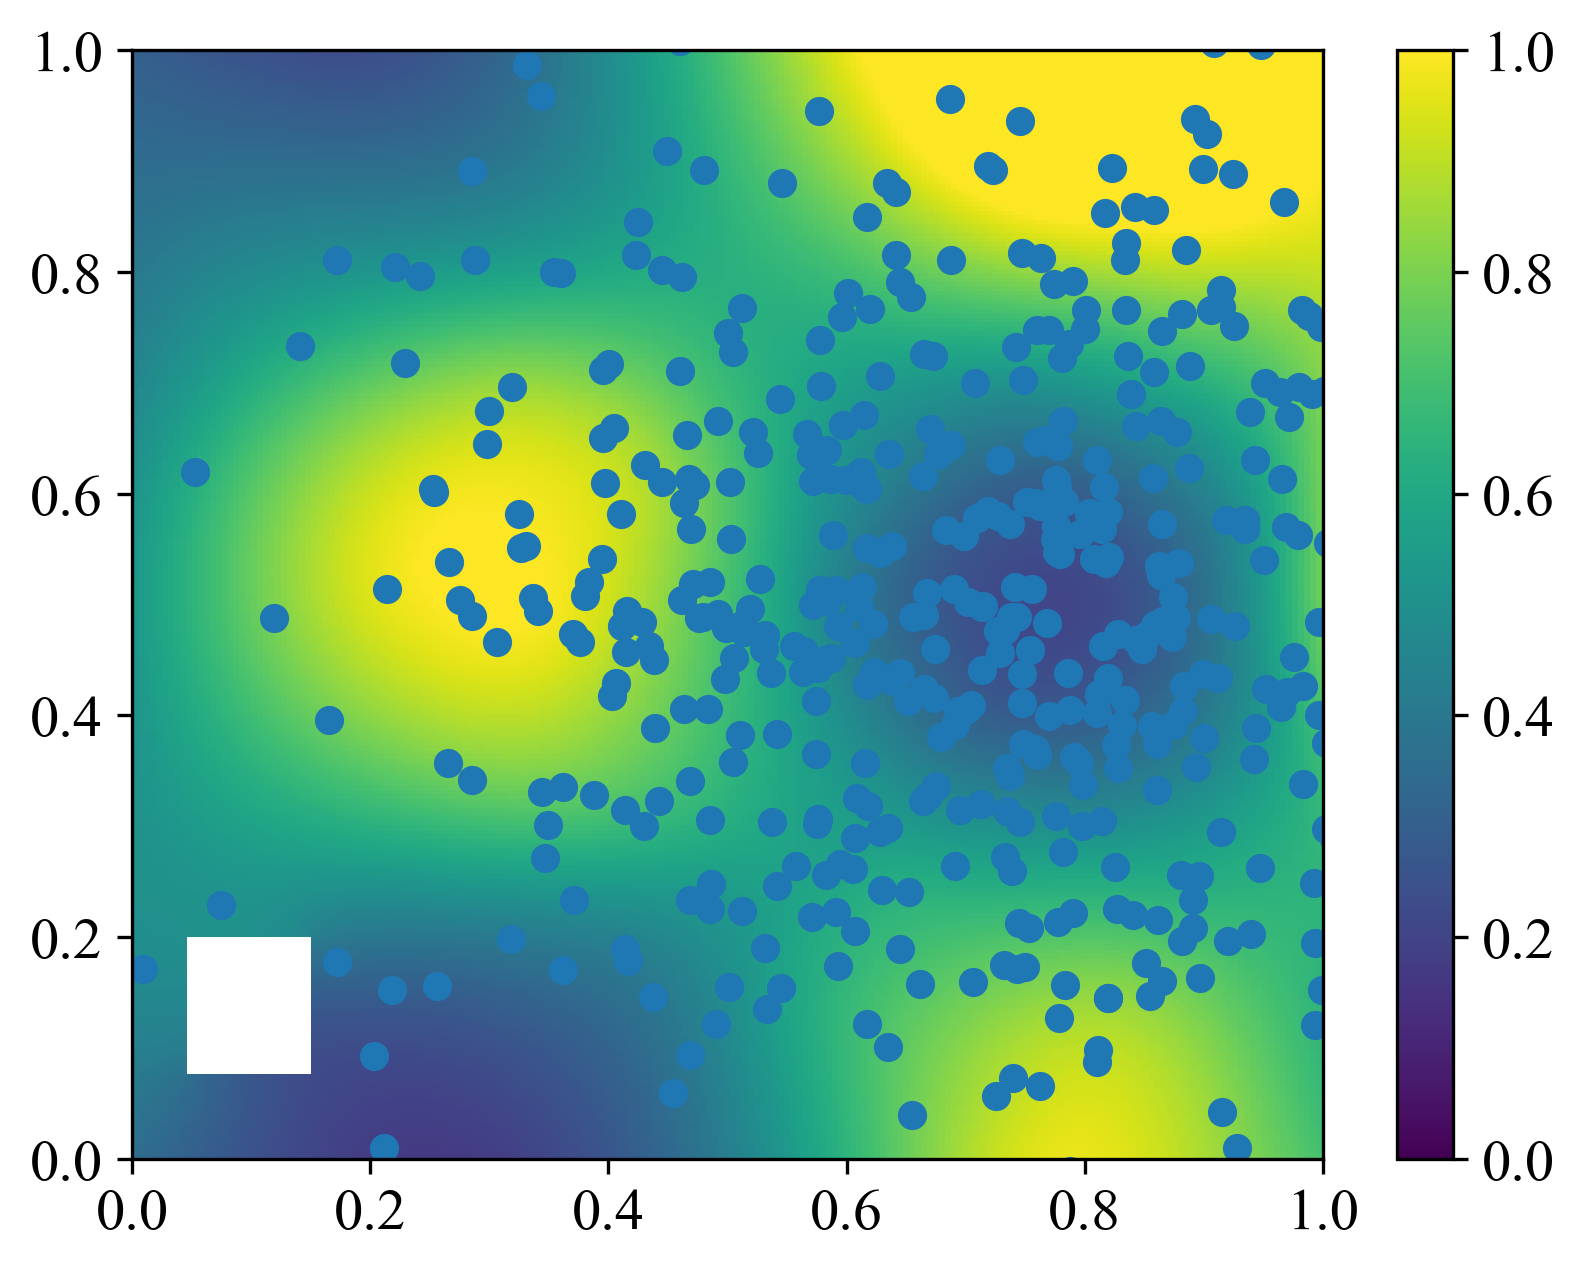

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc411d9750>

In [10]:
pcolor(xi[:,:,2],yi[:,:,2],fim[:,:,2])
clim(-1,1)
scatter(x[v.>1.5],y[v.>1.5])
xlim(0,1)
ylim(0,1)

colorbar()

In [11]:
eof

eof (generic function with 18 methods)

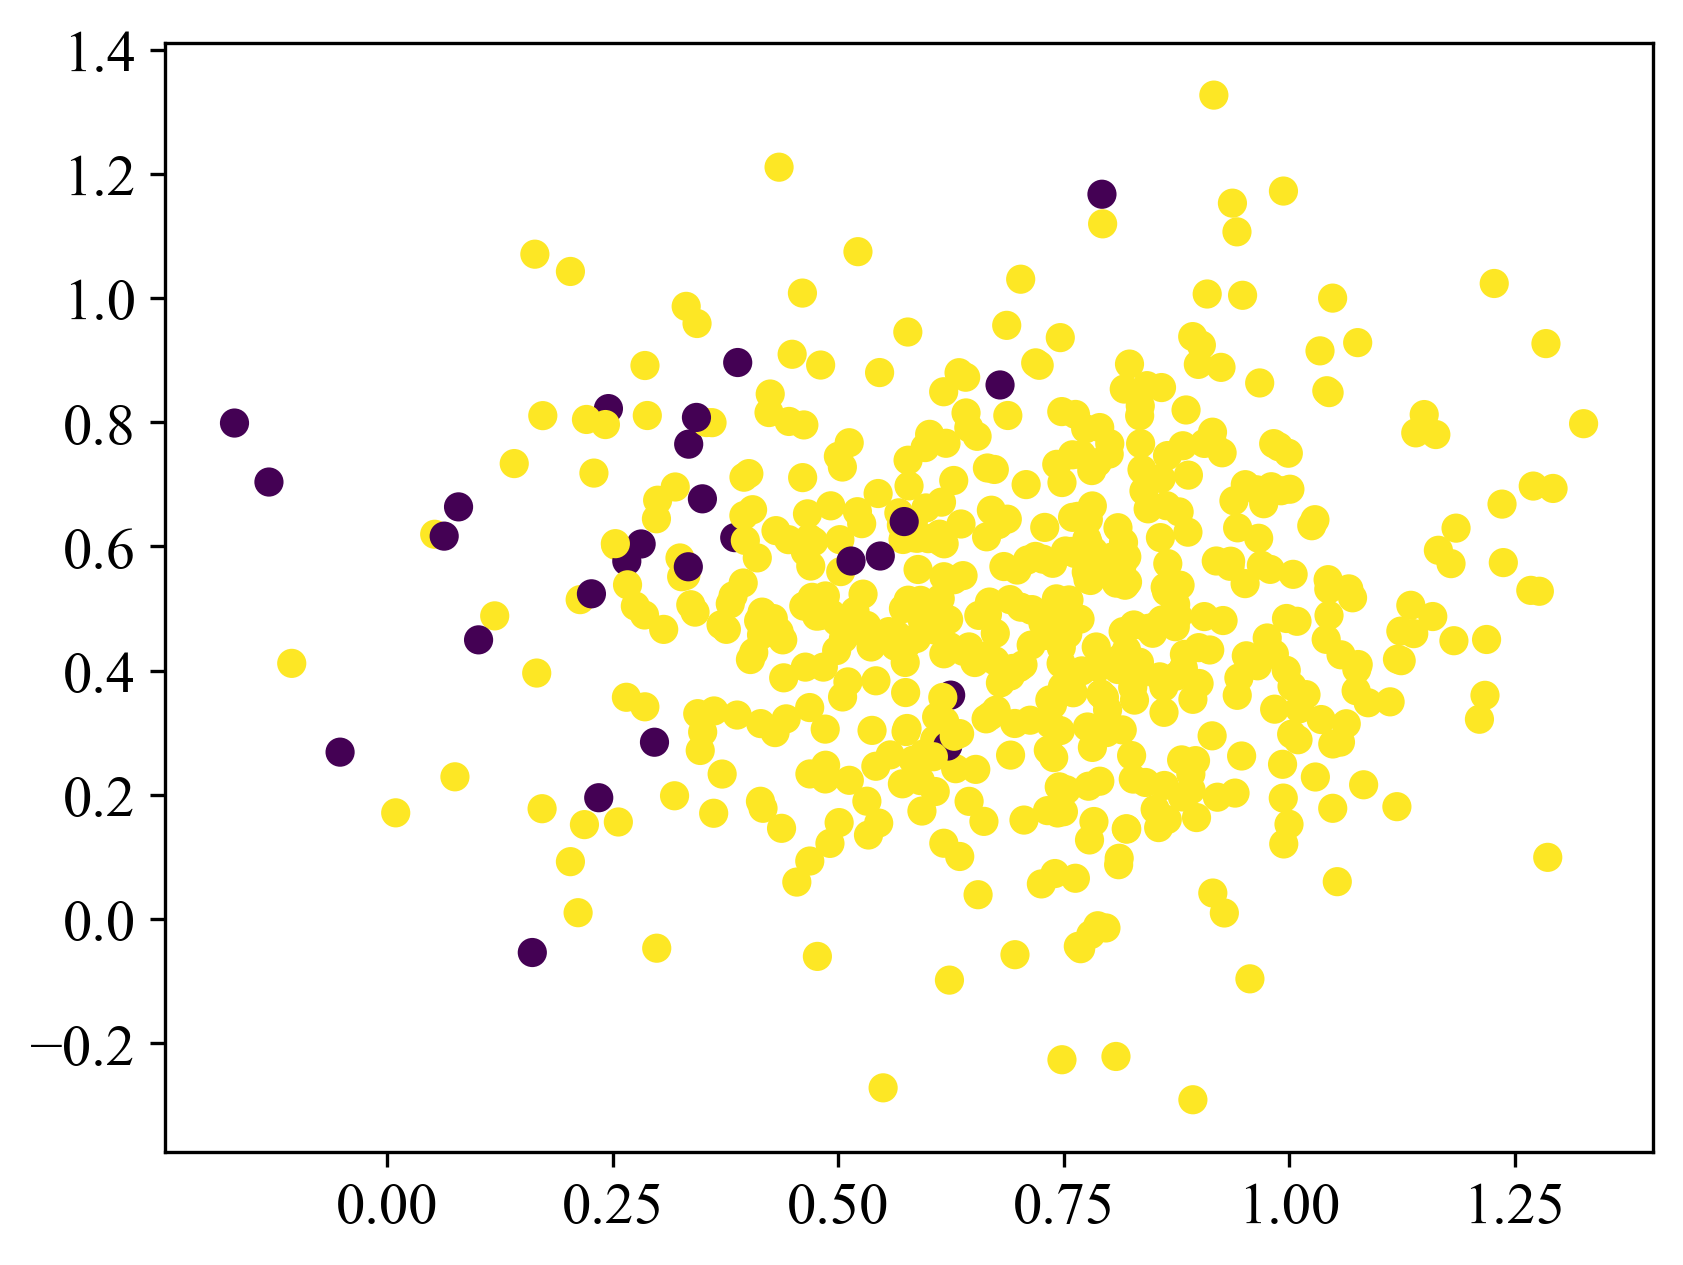

PyObject <matplotlib.collections.PathCollection object at 0x7fbc41123390>

In [12]:
scatter(x,y,c=v)

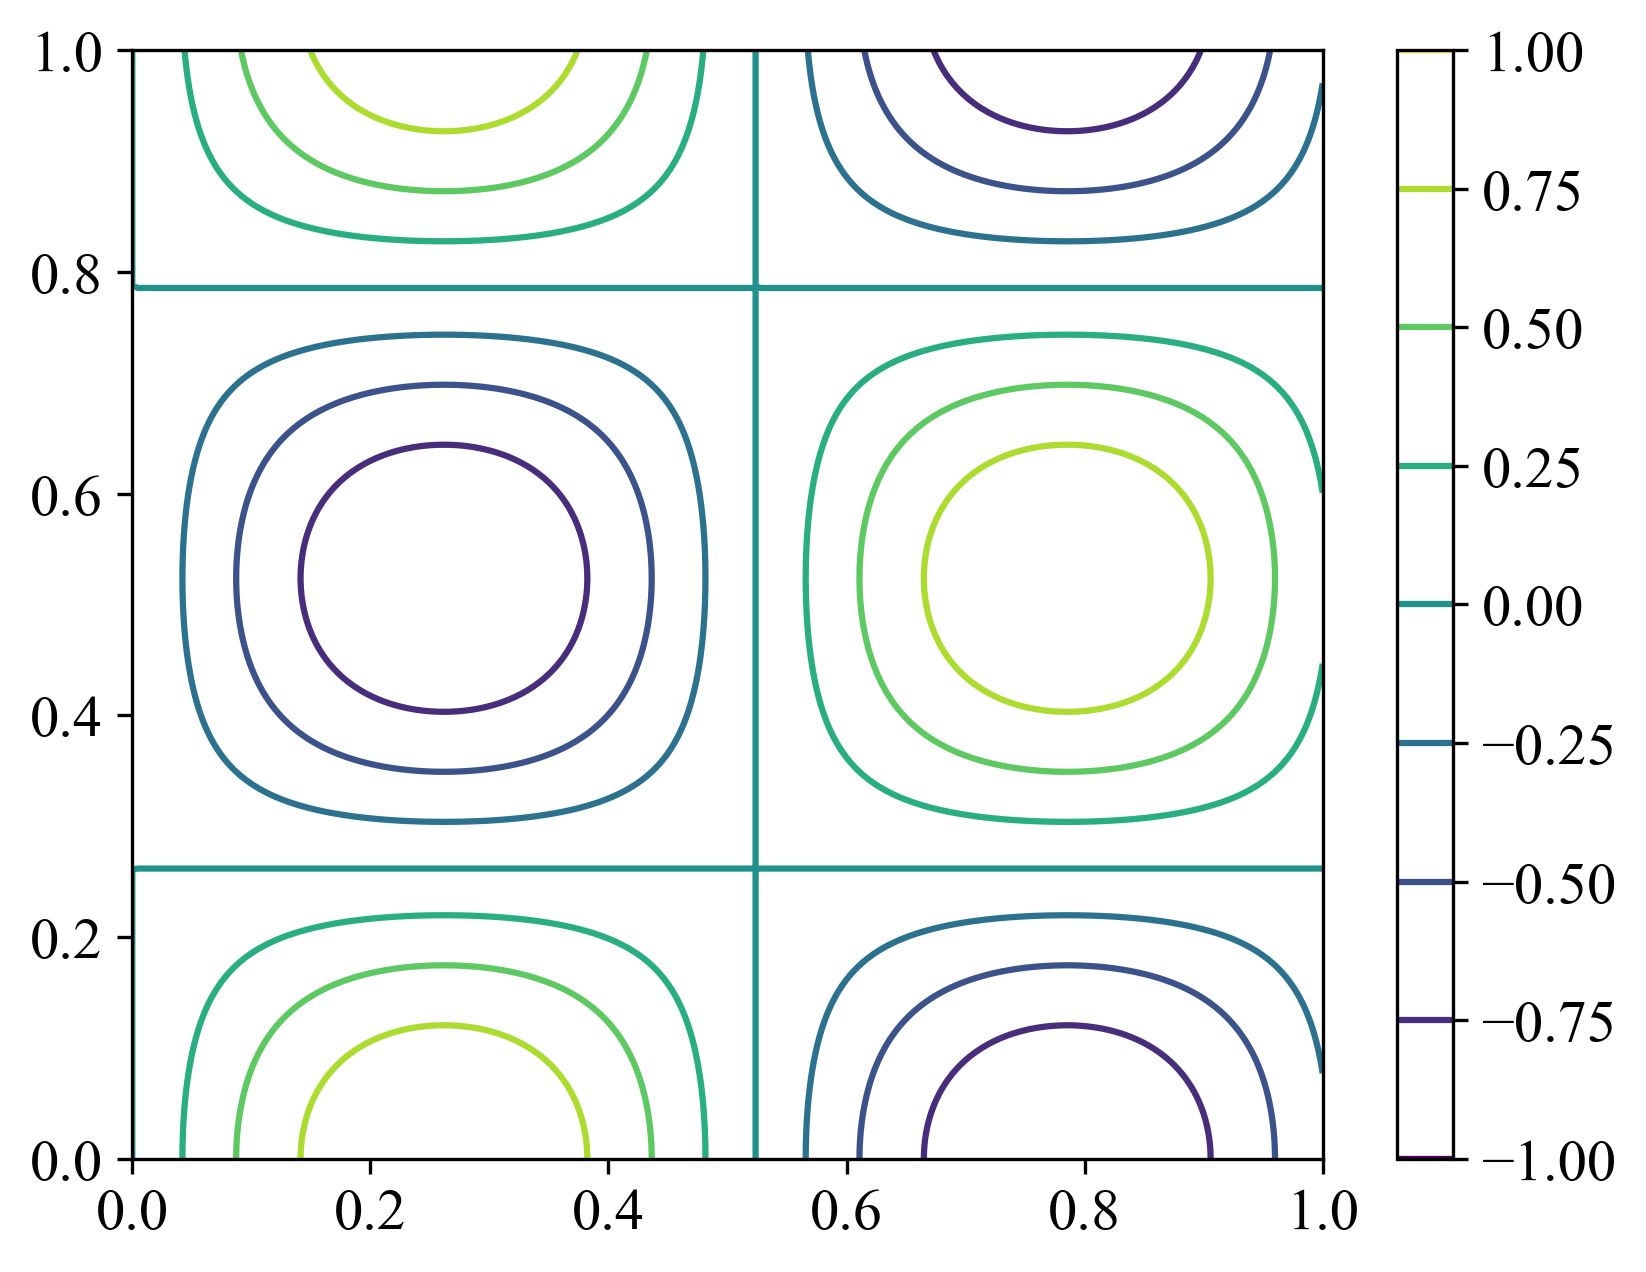

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc4109e610>

In [13]:
contour(xi[:,:,1],yi[:,:,1],fref[:,:,1])
clim(-1,1)
#scatter(x[v.>1.5],y[v.>1.5])
xlim(0,1)
ylim(0,1)
clim(-1,1)
colorbar()

In [14]:
using Statistics
function nanvar(f)
    return var(f[.!isnan.(f)])
end

@show nanvar(fi-fref),nanvar(fim-fref)

@show nanvar(fim[:,:,1]-fref[:,:,1])
@show nanvar(fi[:,:,1]-fref[:,:,1])
@show nanvar(fim[:,:,2]-fref[:,:,2])
@show nanvar(fi[:,:,2]-fref[:,:,2])

(nanvar(fi - fref), nanvar(fim - fref)) = (0.07965912685154673, 0.07990889406324775)
nanvar(fim[:, :, 1] - fref[:, :, 1]) = 0.14624175768850534
nanvar(fi[:, :, 1] - fref[:, :, 1]) = 0.1467078702405197
nanvar(fim[:, :, 2] - fref[:, :, 2]) = 0.009481776895483395
nanvar(fi[:, :, 2] - fref[:, :, 2]) = 0.010721511136432804


0.010721511136432804

In [15]:
extrema(fref)

(-0.9999956276918577, 1.7600673347451958)

In [16]:
extrema(f)

(-1.1808675962415198, 1.8240049536340421)

In [17]:
extrema(fi)

(NaN, NaN)

In [18]:
extrema(fim)

(NaN, NaN)

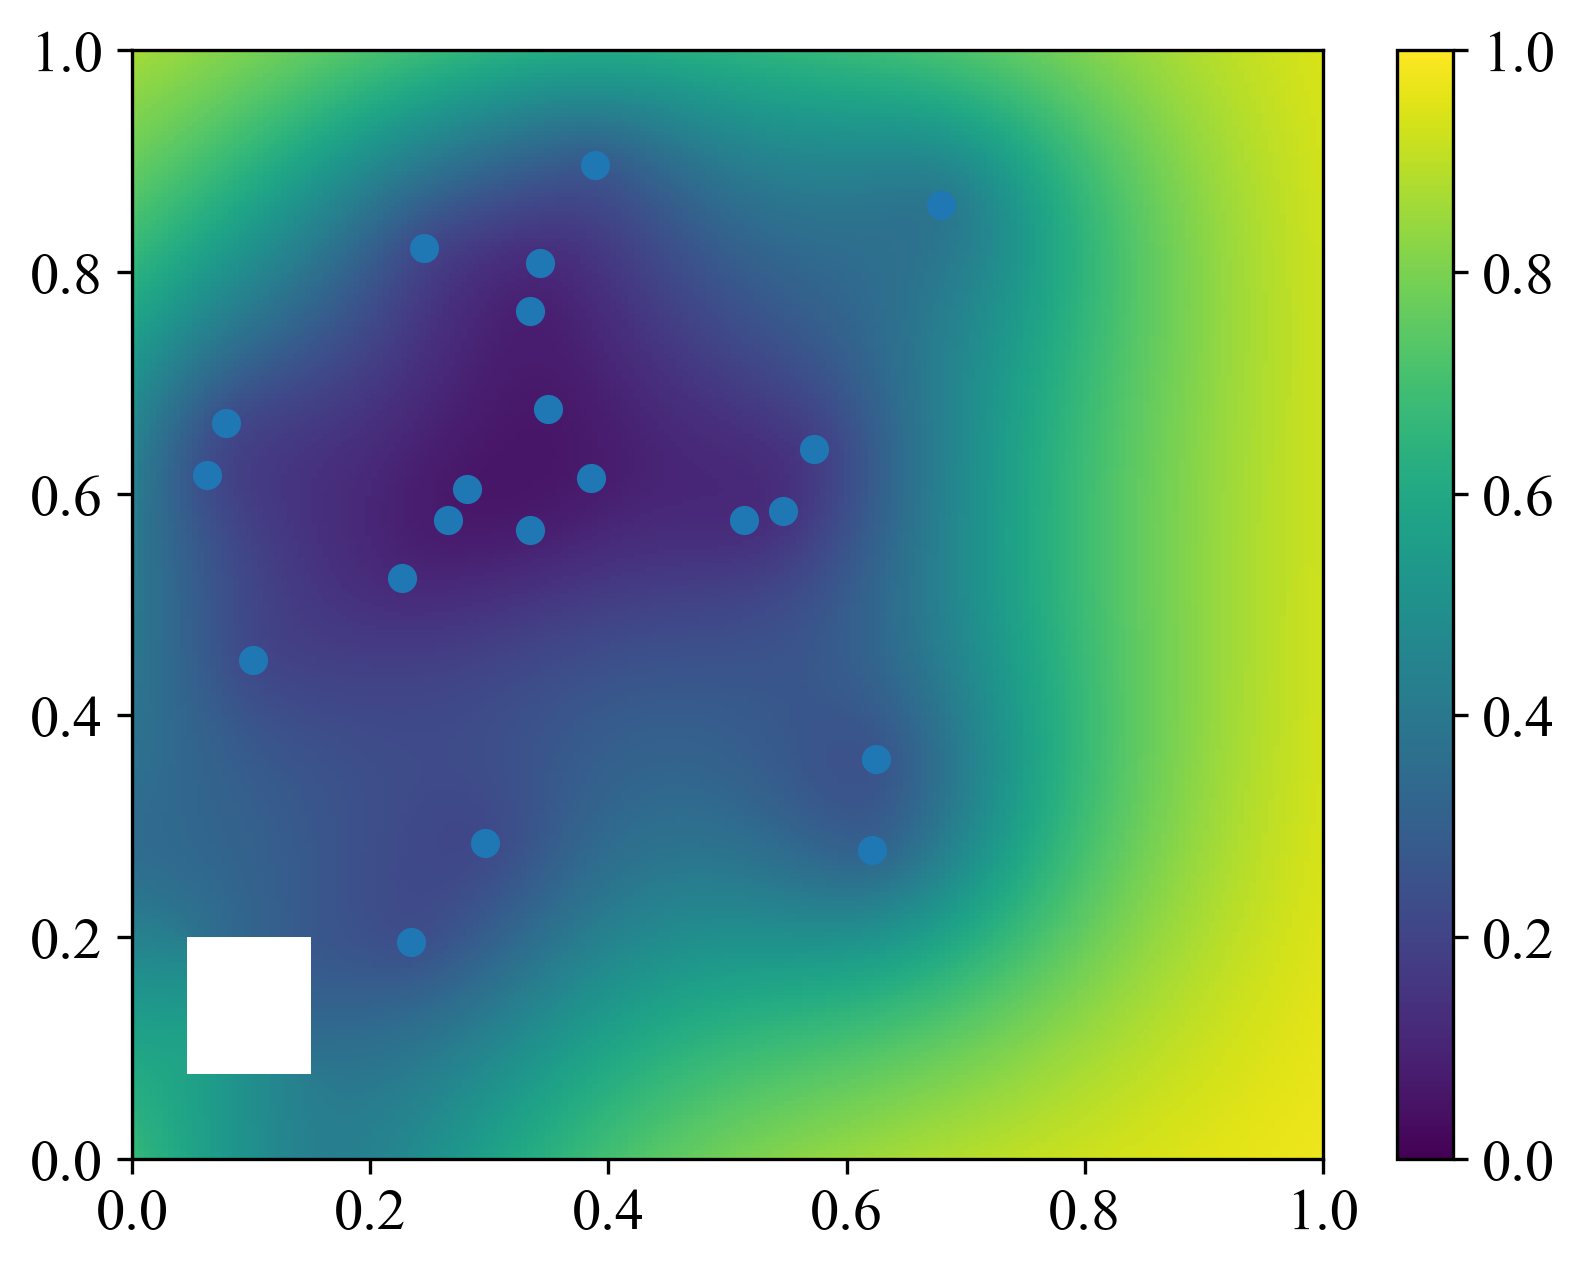

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc3f2725d0>

In [19]:
pcolor(xi[:,:,1],yi[:,:,1],emap[:,:,1])
clim(0,1)
scatter(x[v.<1.5],y[v.<1.5])
xlim(0,1)
ylim(0,1)
clim(0,1)
colorbar()

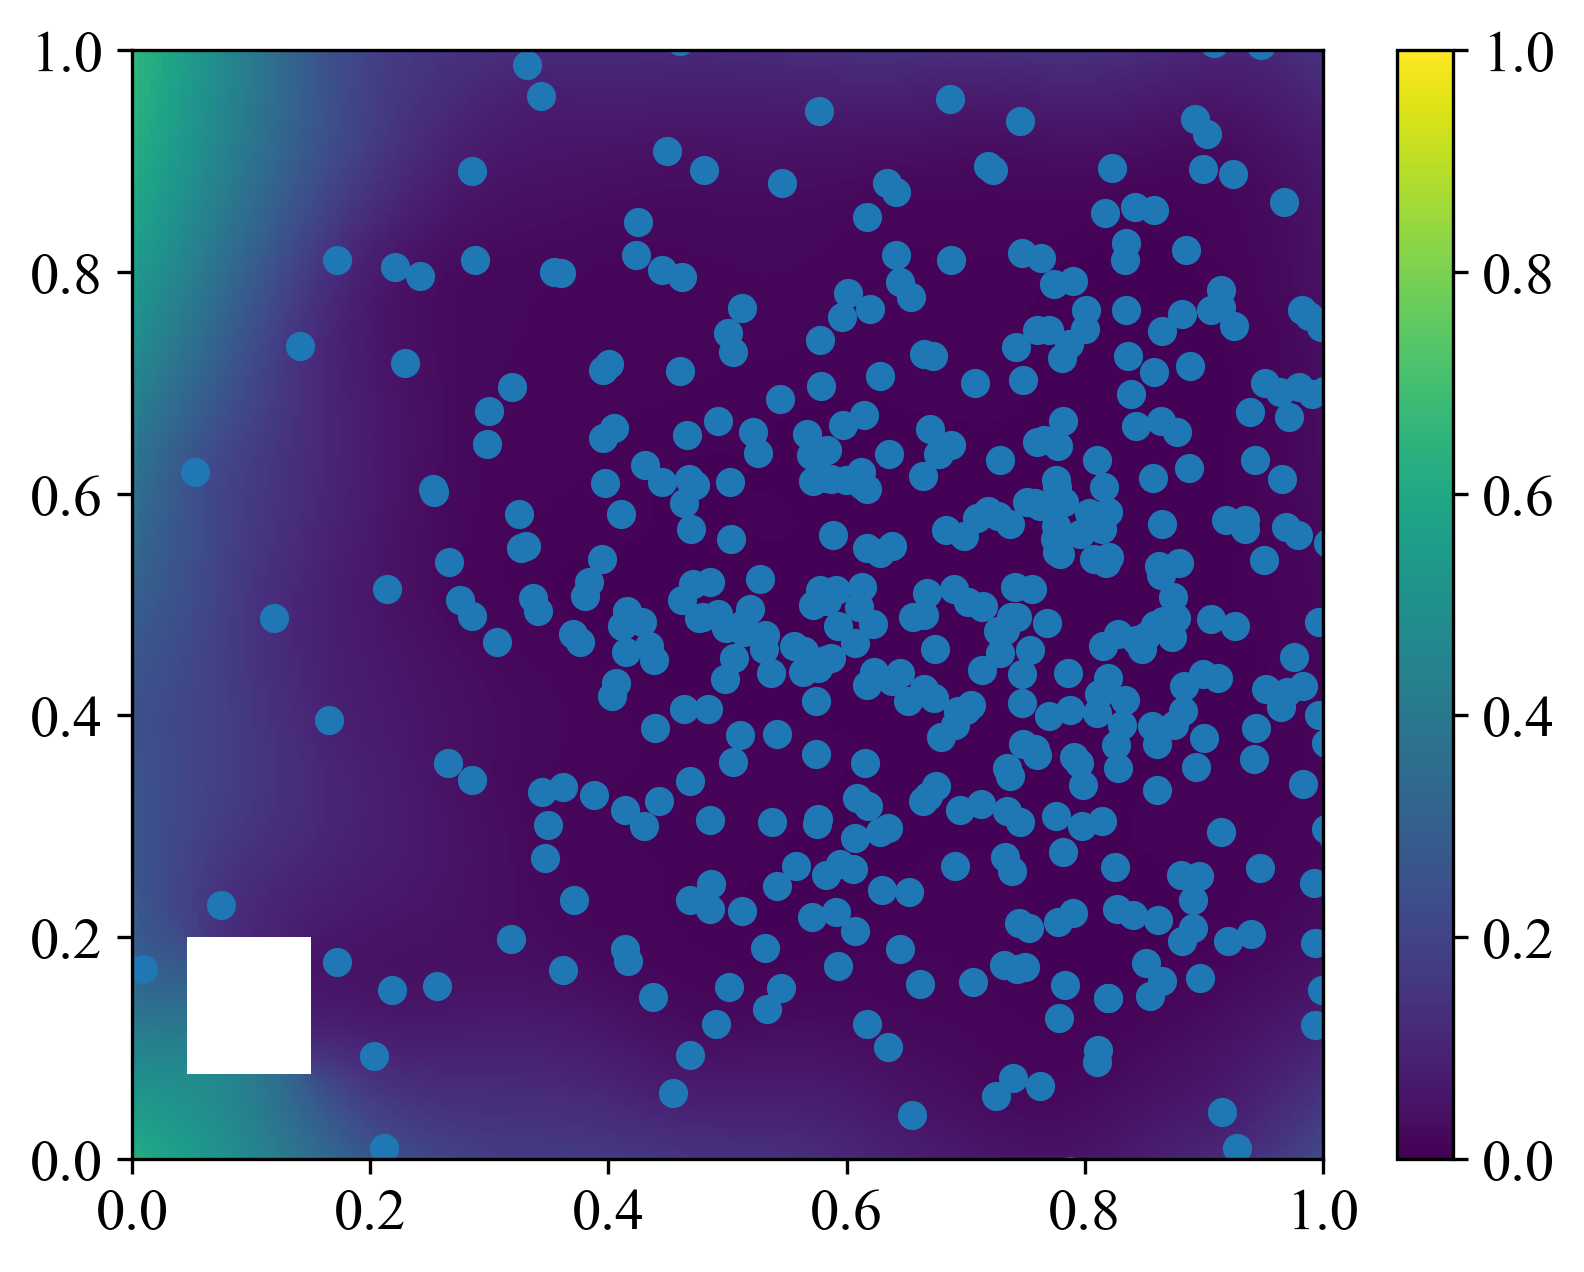

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc3d4d3910>

In [20]:
pcolor(xi[:,:,2],yi[:,:,2],emap[:,:,2])
clim(0,1)
scatter(x[v.>1.5],y[v.>1.5])
xlim(0,1)
ylim(0,1)
clim(0,1)
colorbar()

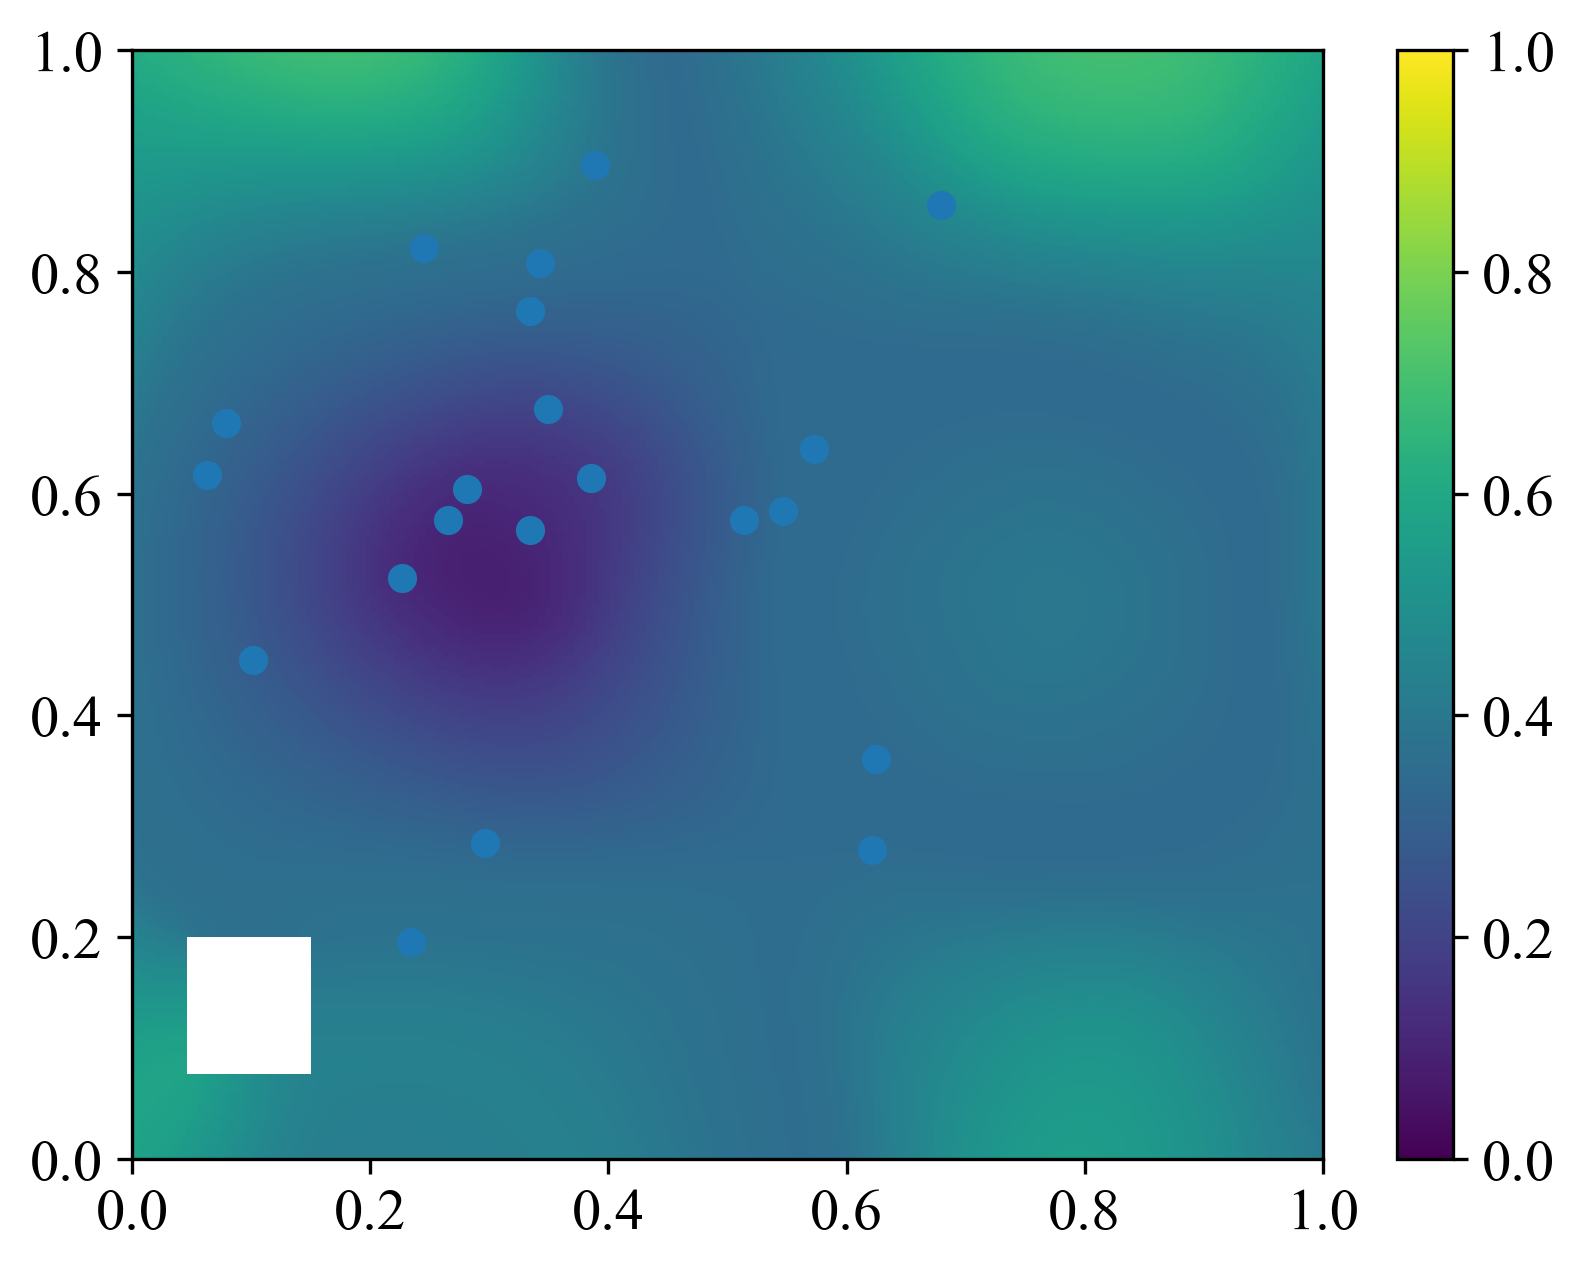

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc3b6bad10>

In [21]:
pcolor(xi[:,:,1],yi[:,:,1],emapm[:,:,1])
clim(0,1)
scatter(x[v.<1.5],y[v.<1.5])
xlim(0,1)
ylim(0,1)
clim(0,1)
colorbar()

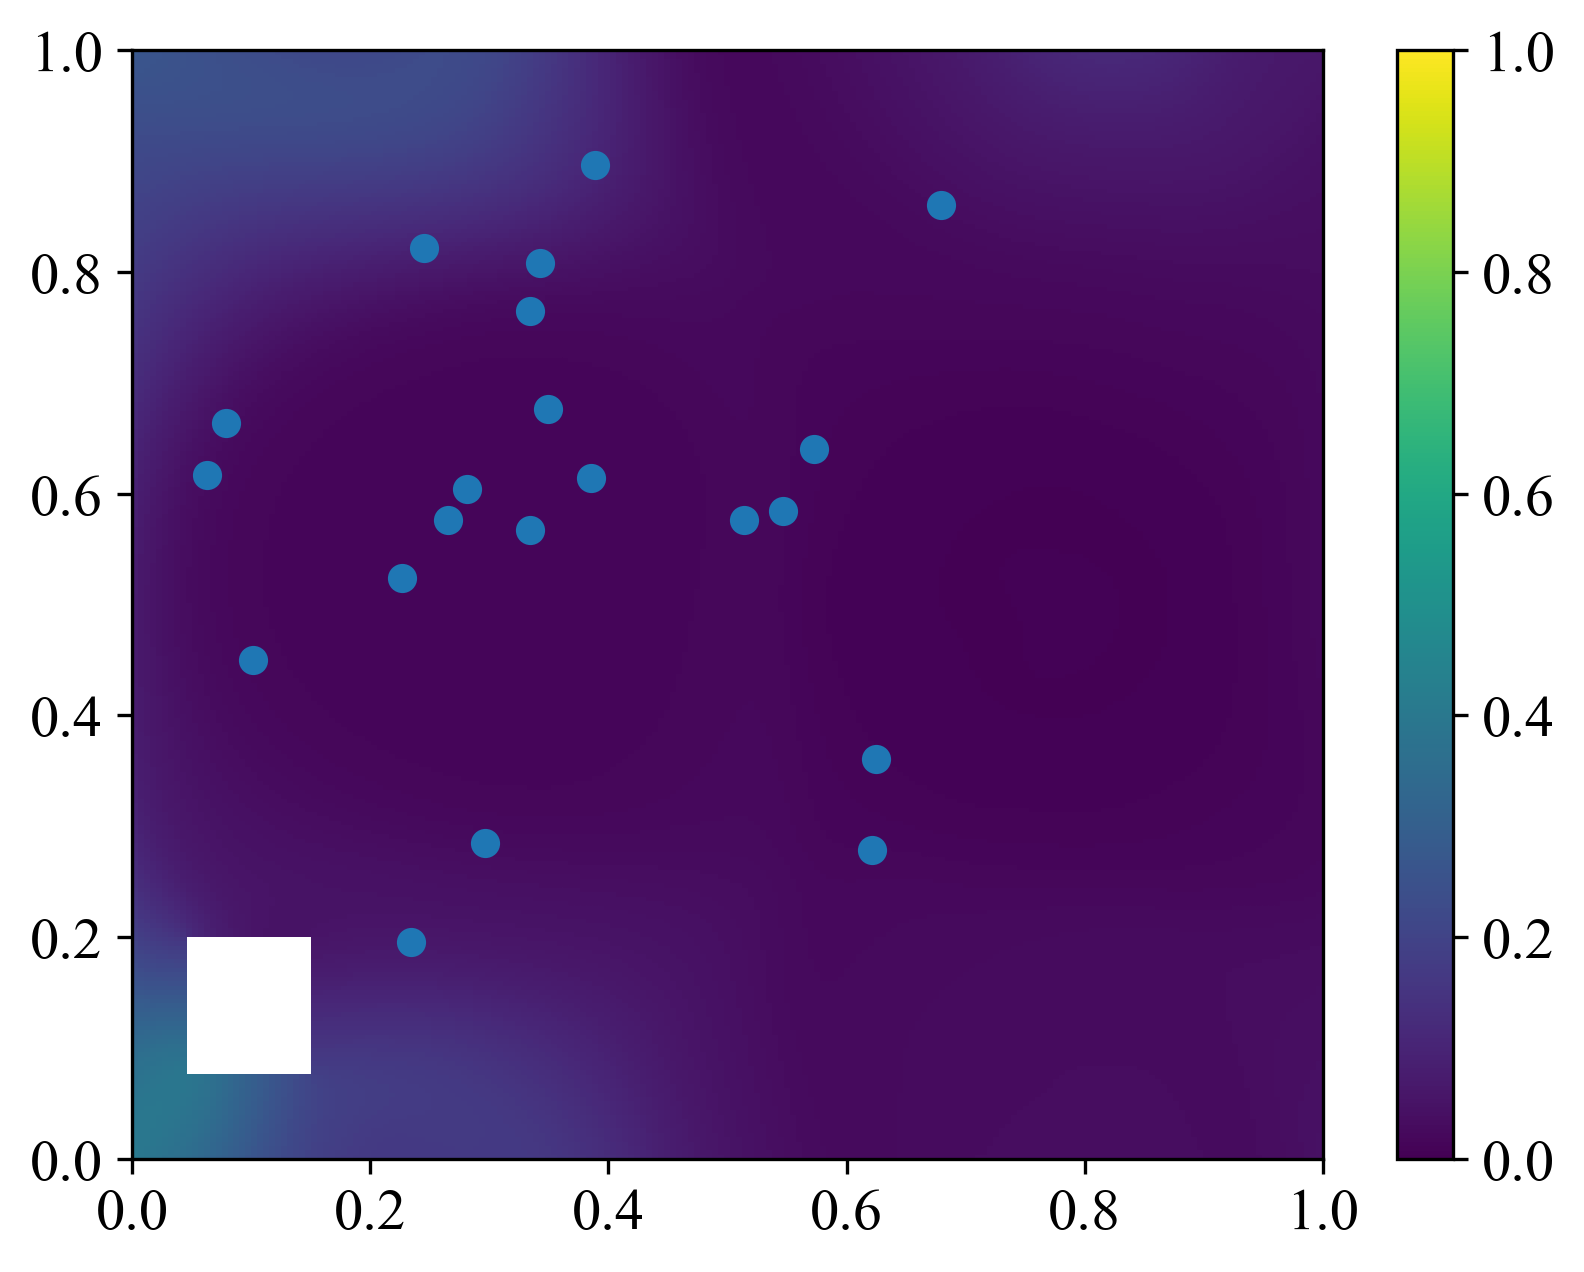

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc3991df90>

In [22]:
pcolor(xi[:,:,1],yi[:,:,1],emapm[:,:,2])
clim(0,1)
scatter(x[v.<1.5],y[v.<1.5])
xlim(0,1)
ylim(0,1)
clim(0,1)
colorbar()

In [23]:
var(emap-emapm),var(emap)

(NaN, NaN)

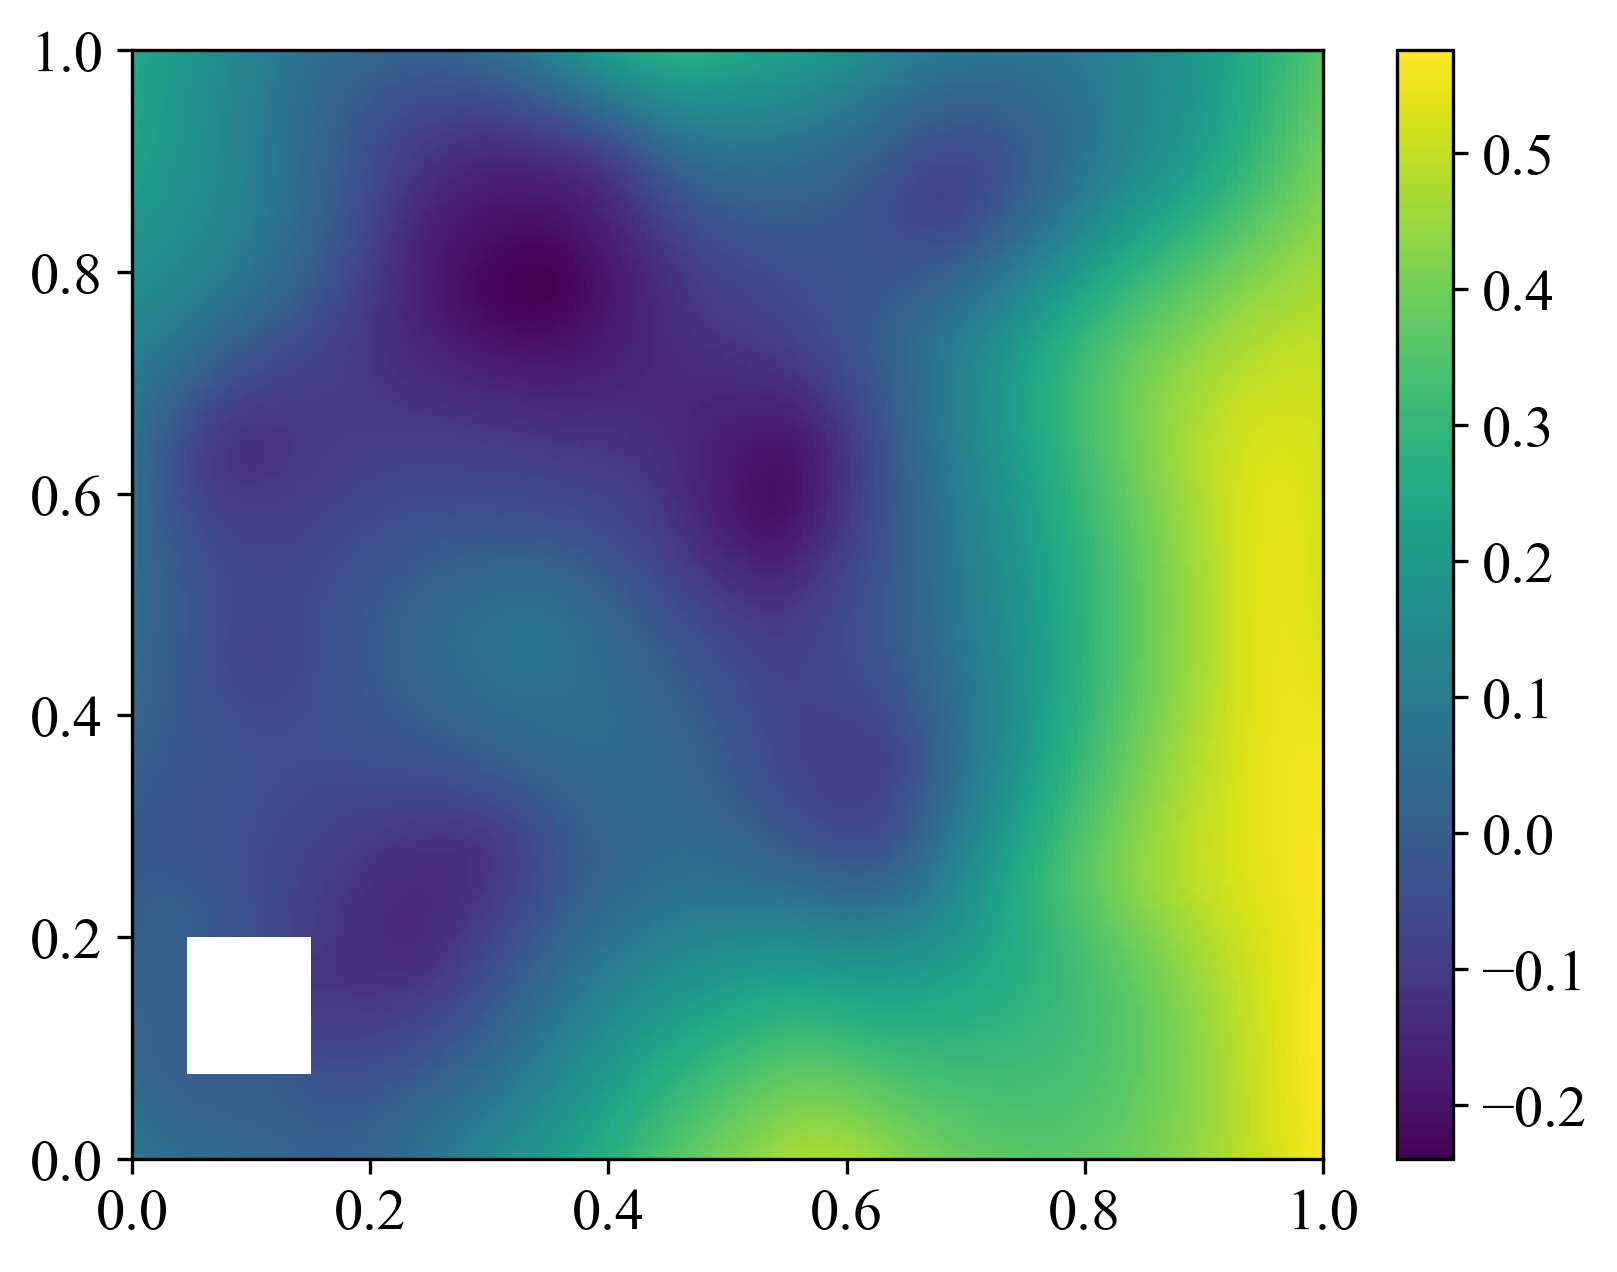

(PyObject <matplotlib.collections.PolyCollection object at 0x7fbc398f80d0>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc37affe50>)

In [24]:

pcolor(xi[:,:,1],yi[:,:,1],emap[:,:,1]-emapm[:,:,1]),colorbar()

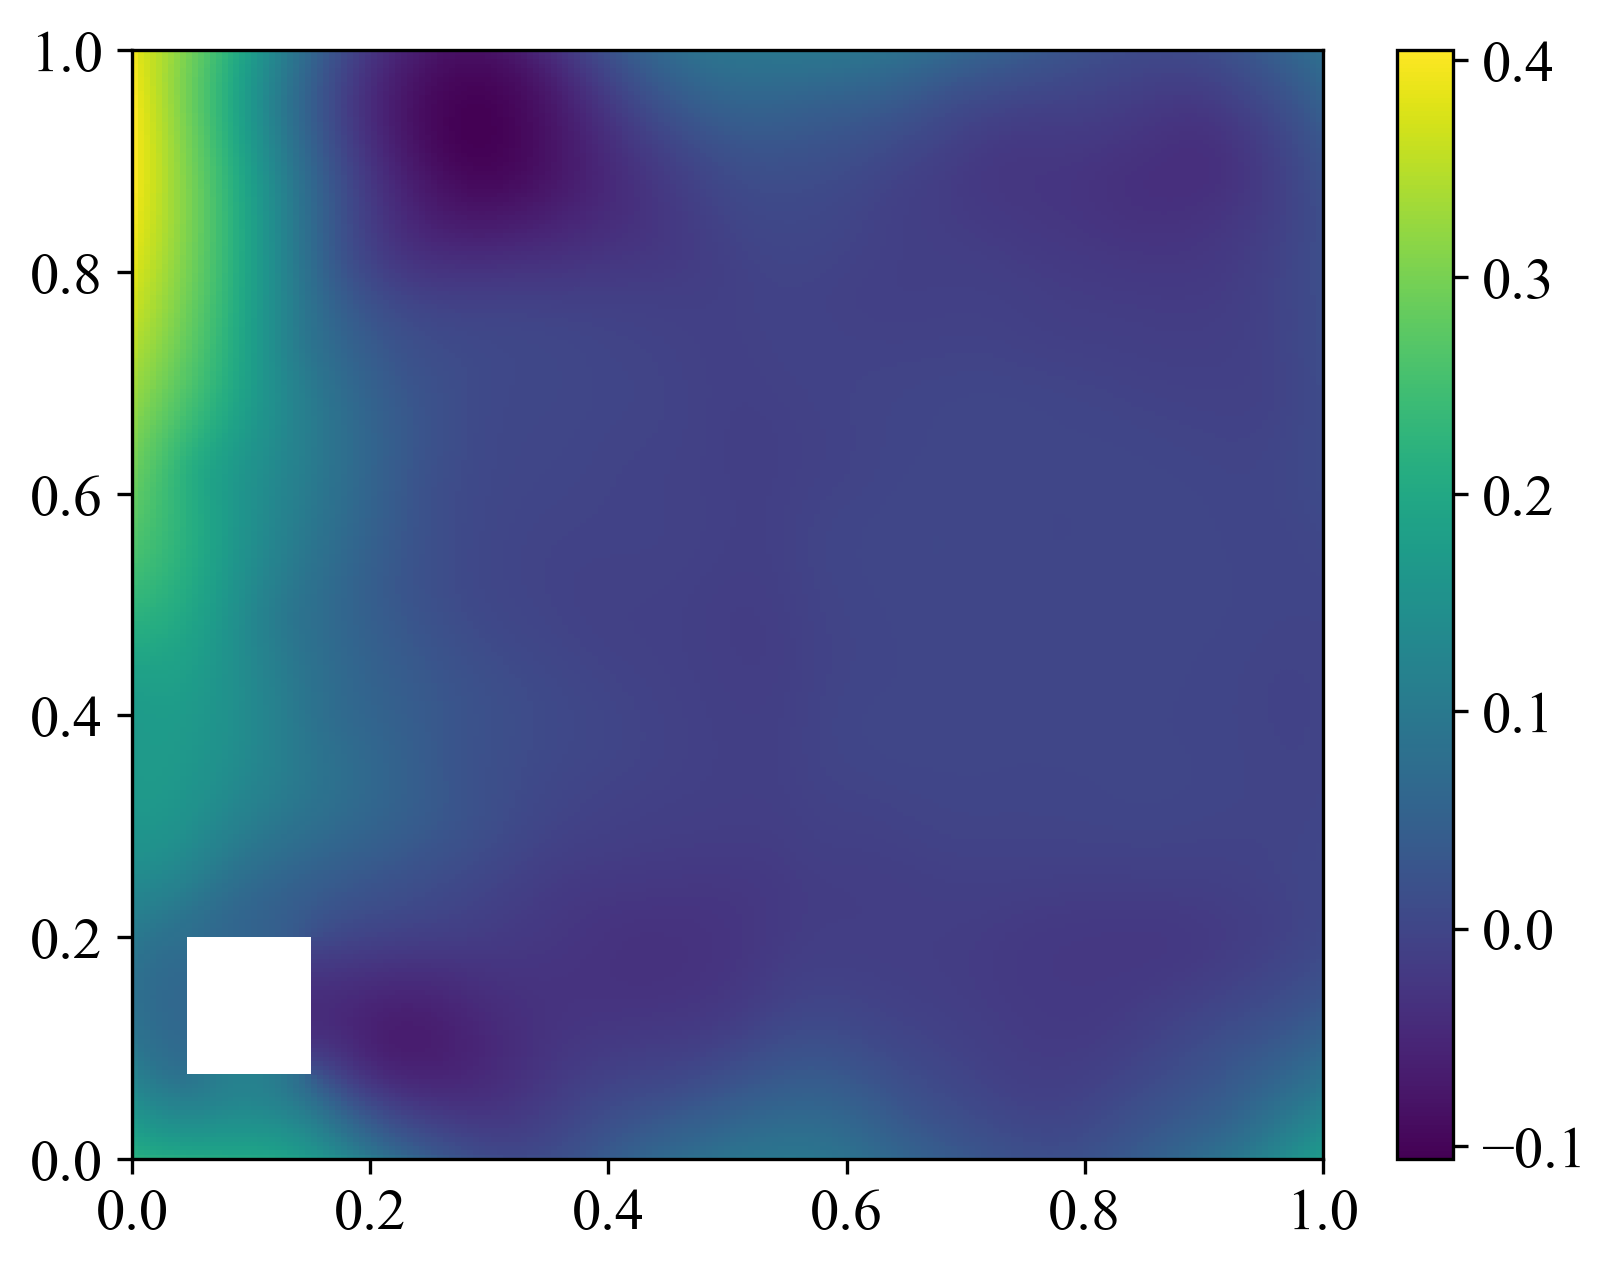

(PyObject <matplotlib.collections.PolyCollection object at 0x7fbc37a8b710>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc35ceea90>)

In [25]:
pcolor(xi[:,:,2],yi[:,:,2],emap[:,:,2]-emapm[:,:,2]),colorbar()

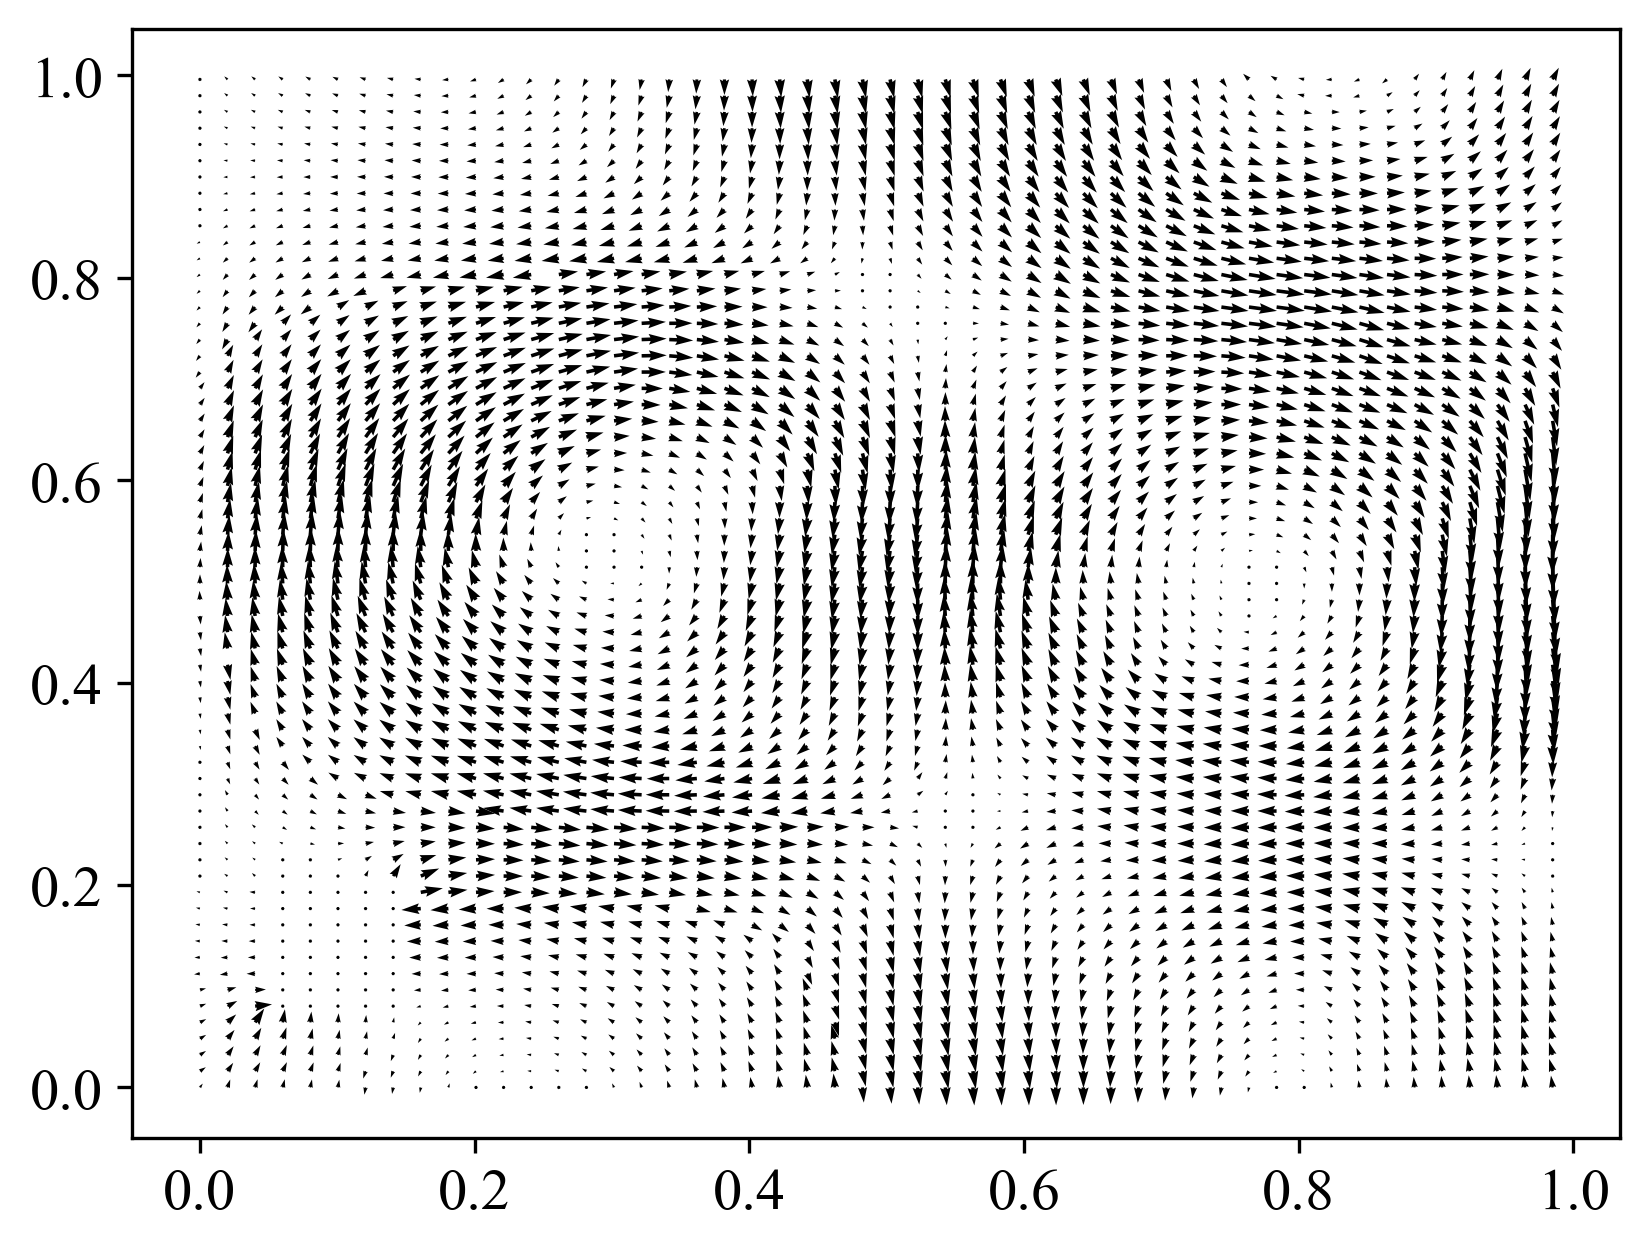

PyObject <matplotlib.quiver.Quiver object at 0x7fbc35c715d0>

In [26]:
r=4
quiver(xi[1:r:end,1:r:end,1],yi[1:r:end,1:r:end,1],pv[1][1:r:end,1:r:end,1],pv[2][1:r:end,1:r:end,1])

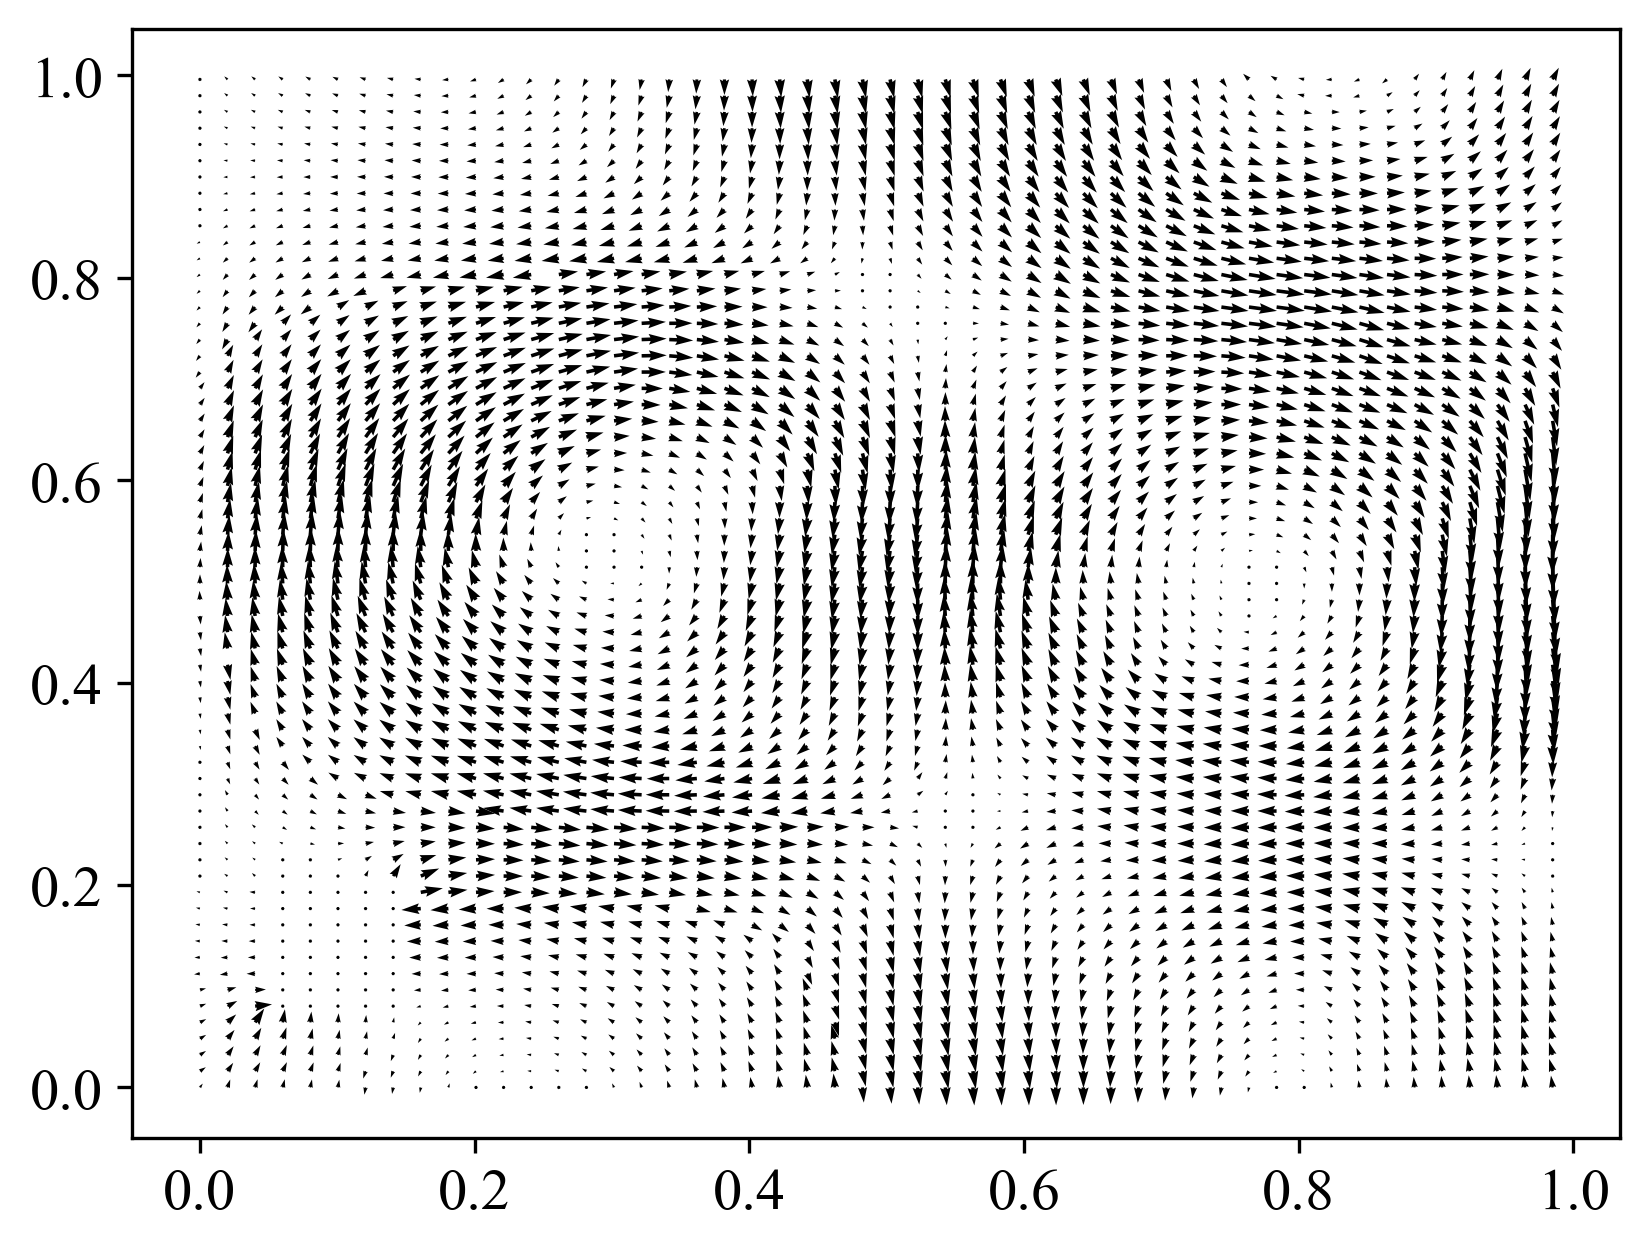

PyObject <matplotlib.quiver.Quiver object at 0x7fbc3590bb90>

In [27]:
r=4
quiver(xi[1:r:end,1:r:end,1],yi[1:r:end,1:r:end,1],pv[1][1:r:end,1:r:end,2],pv[2][1:r:end,1:r:end,2])

In [28]:
var(pv[1][:,:,1])

0.02139976093144656

In [29]:
var(pv[1][:,:,2])

0.002139976093144656